In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
from pandas import DataFrame

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

## Подготовим данные

In [9]:
#Загружаем данные из csv файла ./data/data.csv в текущей директории. Разделитель чисел указываем ','
df_all_engines = pd.read_csv("./data/data.csv", decimal=",")
# Заменяем имя столбца "№" на 'Number'
df_all_engines.rename({"№": 'Number'}, axis=1, inplace=True)
# Выводим 10 ерхних записей чтобы убедиться что данные загрузились корректно
df_all_engines.head(10)

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
0,1,0.000648,-30,8,30,1543.3,9.8644,0.82,0.21679,0.39073,...,0.05095,89.201,2.4133,372.69,72.046,934.49,6.8091,943.96,45,2.15
1,2,0.000564,-30,8,30,1561.3,9.9798,0.82,0.21428,0.39530,...,0.03801,90.601,2.4128,370.14,72.063,928.49,6.8396,941.81,45,2.15
2,3,0.000479,-30,8,30,1575.7,10.0720,0.82,0.21232,0.39895,...,0.02820,89.601,2.4125,368.59,72.069,924.78,6.8709,941.93,45,2.15
3,4,0.000648,-20,8,30,1759.3,11.2460,0.92,0.21335,0.39702,...,0.05511,89.001,2.4141,368.88,72.312,927.99,7.3033,997.50,45,2.15
4,5,0.000564,-20,8,30,1771.8,11.3250,0.92,0.21185,0.39984,...,0.04087,93.201,2.4137,367.18,72.284,923.54,7.3549,1000.40,45,2.15
5,6,0.000479,-20,8,30,1786.1,11.4170,0.92,0.21015,0.40307,...,0.03086,95.201,2.3879,364.60,71.548,917.50,7.3780,1007.00,45,2.15
6,7,0.000648,-10,8,30,1967.3,12.5750,1.02,0.21153,0.40043,...,0.05491,90.601,2.3897,367.12,71.722,925.40,7.7625,1060.80,45,2.15
7,8,0.000564,-10,8,30,1978.4,12.6460,1.02,0.21036,0.40268,...,0.04044,97.201,2.3888,366.15,71.651,922.39,7.8372,1069.50,45,2.15
8,9,0.000479,-10,8,30,1983.2,12.6770,1.02,0.20984,0.40366,...,0.02980,101.600,2.3880,365.19,71.599,919.63,7.9174,1078.40,45,2.15
9,10,0.000648,-26,12,30,1551.8,9.9191,0.82,0.21559,0.39290,...,0.05537,88.201,2.2012,356.34,72.372,921.35,6.8232,928.87,30,2.15


Проверяем какой тип данных имеют столбцы. int64 - целые числа

In [10]:
df_all_engines.x4.head()

0    30
1    30
2    30
3    30
4    30
Name: x4, dtype: int64

In [11]:
df_all_engines.Number.head()

0    1
1    2
2    3
3    4
4    5
Name: Number, dtype: int64

Для столбца Ne - тип float64 - числа с плавающей запятой

In [13]:
df_all_engines.Ne.head()

0    1543.3
1    1561.3
2    1575.7
3    1759.3
4    1771.8
Name: Ne, dtype: float64

Все данные загрузились с корректными типами.
Установим общий стиль графиков:

In [14]:
plt.style.use('fivethirtyeight')

## Посмотрим как менялась мощьность в ходе экспериментов для всех 83 случаев

Text(0, 0.5, 'Мощьность кВт')

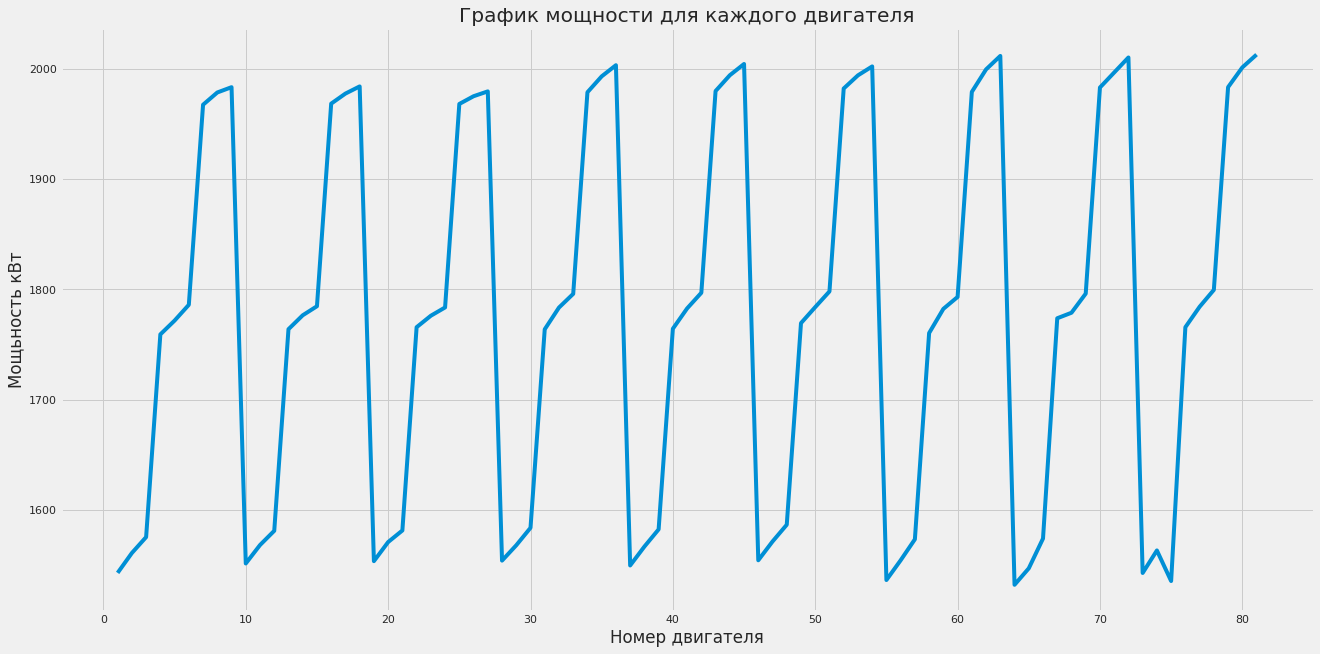

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(df_all_engines.Number, df_all_engines.Ne)
plt.title("График мощности для каждого двигателя")
plt.xlabel("Номер двигателя")
plt.ylabel("Мощьность кВт")

## Теперь проследим изменение КПД

Для начала вставим корректное значение. В 12 ячейке было значение 399807, очевидно это ошибка, поправим ее

In [16]:
df_all_engines["кпд е"][12] = 0.399807


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'КПД')

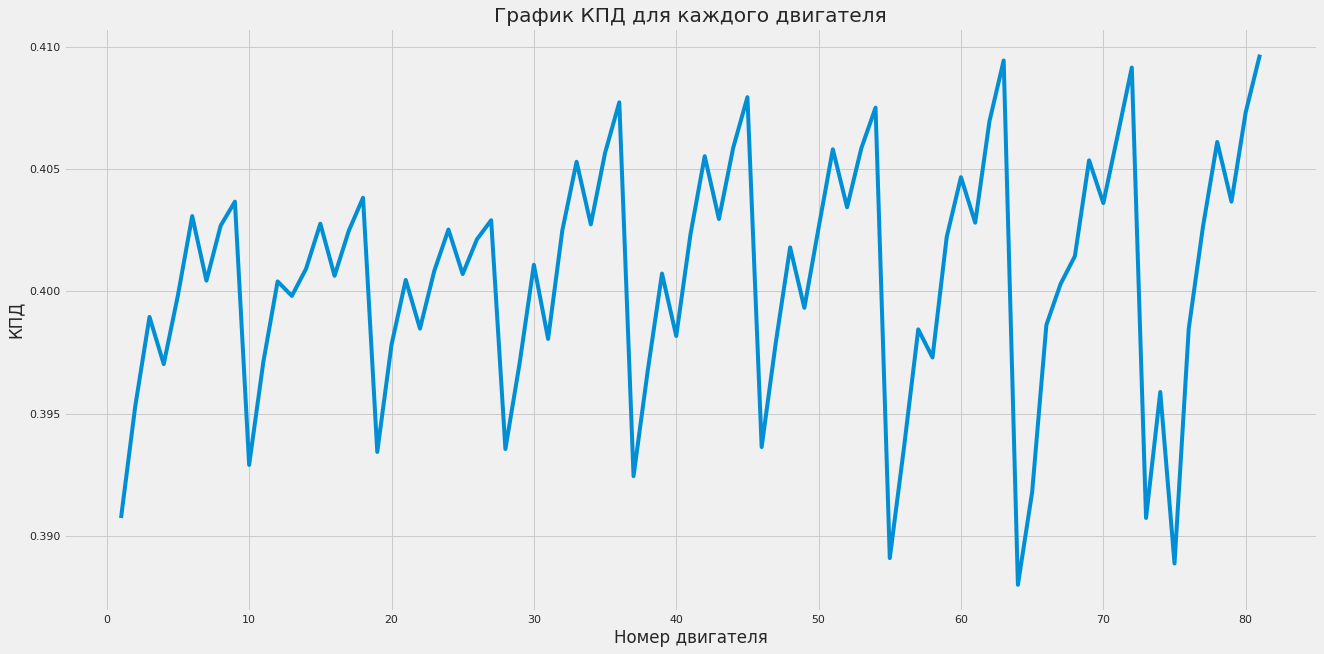

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(df_all_engines.Number, df_all_engines["кпд е"])
plt.title("График КПД для каждого двигателя")
plt.xlabel("Номер двигателя")
plt.ylabel("КПД")

Создадим отдельные датасеты сгруппированные по парметру x2 - угол опережения подачи топлава

In [19]:
# Для всех двигателей с пораметром ч2 = -30 создадим датасет
df_x2_30 = df_all_engines[df_all_engines.x2 == -30]
# Для всех остальных возможных значений х2 создадим датасеты по аналогии:
df_x2_26 = df_all_engines[df_all_engines.x2 == -26]
df_x2_20 = df_all_engines[df_all_engines.x2 == -20]
df_x2_16 = df_all_engines[df_all_engines.x2 == -16]
df_x2_12 = df_all_engines[df_all_engines.x2 == -12]
df_x2_10 = df_all_engines[df_all_engines.x2 == -10]
df_x2_6 = df_all_engines[df_all_engines.x2 == -6]
df_x2_2 = df_all_engines[df_all_engines.x2 == -2]
# Проверим что датасет корректно сформировался. Выведем последние 5 значений для группы х2 = -30
df_x2_30.tail()

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
28,29,0.000564,-30,8,15,1568.3,10.0240,0.82,0.21333,0.39706,...,0.03488,84.0,2.6611,368.09,79.561,924.29,7.1197,885.58,45,2.39
29,30,0.000479,-30,8,15,1584.1,10.1260,0.82,0.21119,0.40108,...,0.02562,83.6,2.6607,366.76,79.545,920.91,7.1476,885.73,45,2.39
54,55,0.000648,-30,8,0,1536.8,9.8229,0.82,0.21770,0.38909,...,0.04099,79.8,2.9346,373.33,87.557,935.51,7.4097,849.04,45,2.63
55,56,0.000564,-30,8,0,1554.7,9.9373,0.82,0.21520,0.39362,...,0.02983,80.4,2.9342,371.78,87.562,931.81,7.4247,847.14,45,2.63
56,57,0.000479,-30,8,0,1573.7,10.0590,0.82,0.21259,0.39844,...,0.02201,80.2,2.9338,369.97,87.564,927.42,7.4518,846.04,45,2.63


Попробуем выявить зависимость КПД от расхода топлива для сформированных выше групп

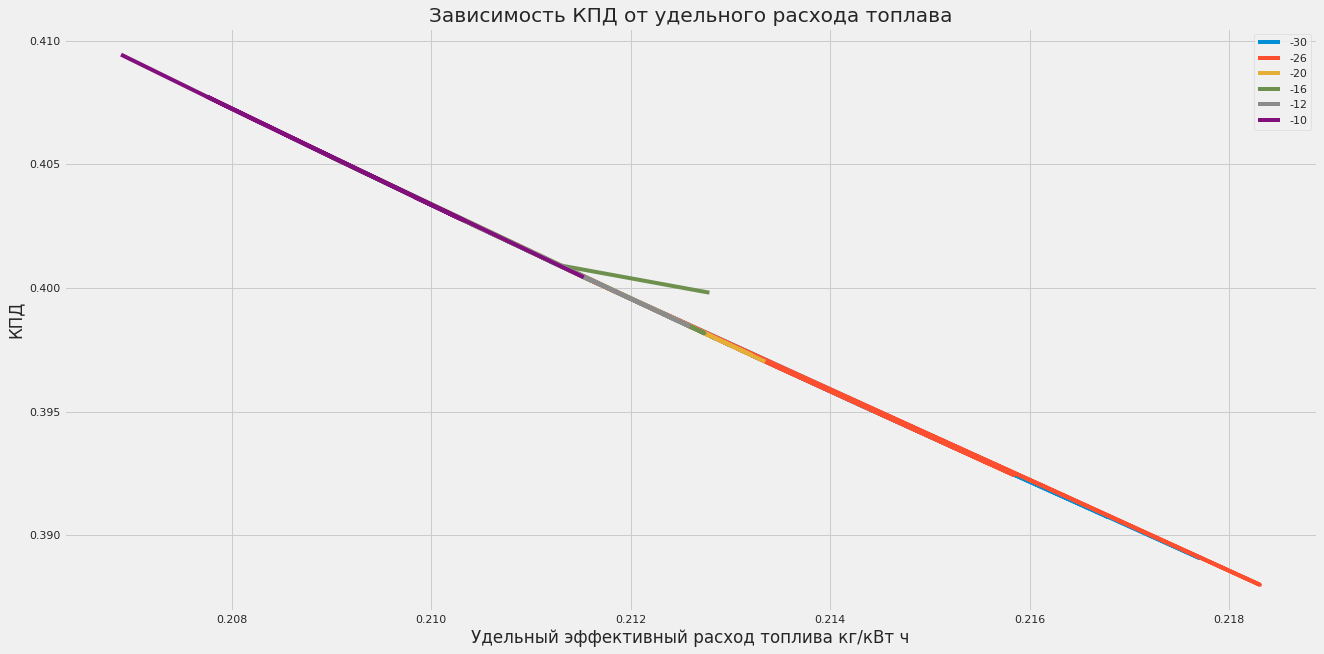

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(df_x2_30["be"], df_x2_30["кпд е"], label='-30')
plt.plot(df_x2_26["be"], df_x2_26["кпд е"], label='-26')
plt.plot(df_x2_20["be"], df_x2_20["кпд е"], label='-20')
plt.plot(df_x2_16["be"], df_x2_16["кпд е"], label='-16')
plt.plot(df_x2_12["be"], df_x2_12["кпд е"], label='-12')
plt.plot(df_x2_10["be"], df_x2_10["кпд е"], label='-10')
plt.title("Зависимость КПД от удельного расхода топлава")
plt.xlabel("Удельный эффективный расход топлива кг/кВт ч")
plt.ylabel("КПД")
plt.legend()

Видим что группы с уголом опережения подачи топлава = -10 имеют наименьший расход топлива и большее КПД

Попробуем построить зависимость мощьности от расхода топлива для групп.

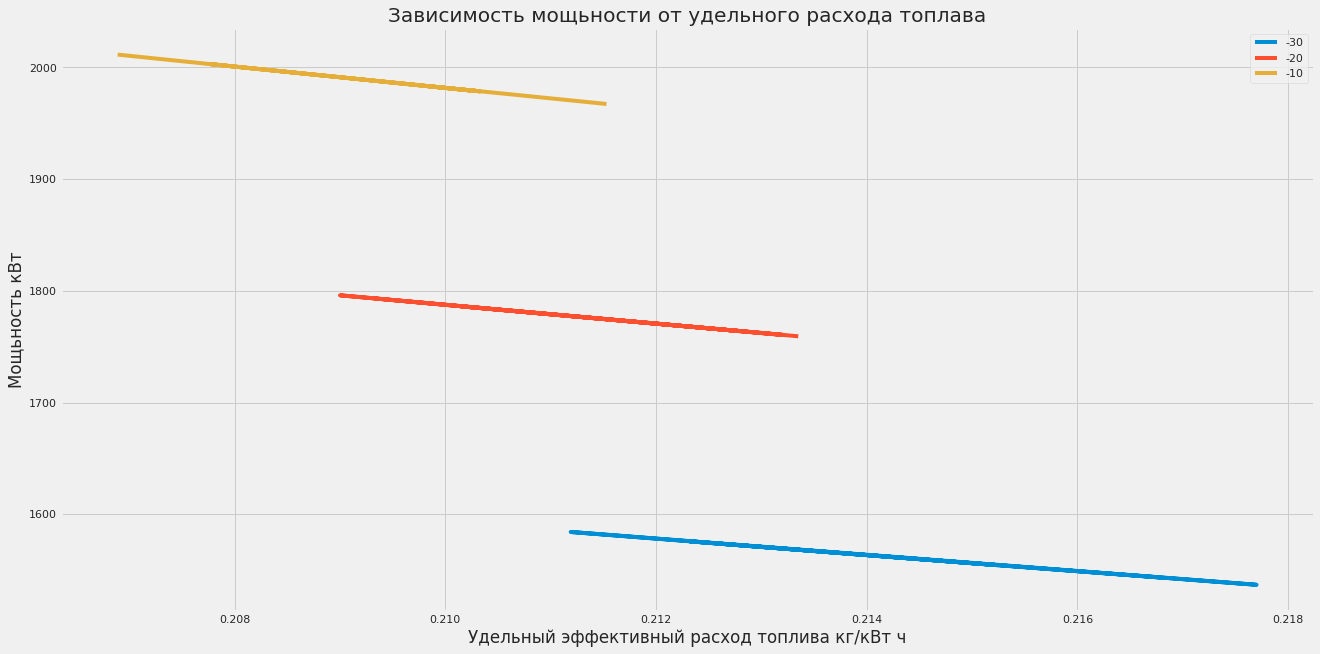

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(df_x2_30["be"], df_x2_30.Ne, label='-30')
plt.plot(df_x2_20["be"], df_x2_20.Ne, label='-20')
plt.plot(df_x2_10["be"], df_x2_10.Ne, label='-10')
plt.title("Зависимость мощьности от удельного расхода топлава")
plt.xlabel("Удельный эффективный расход топлива кг/кВт ч")
plt.ylabel("Мощьность кВт")
plt.legend()

Видим, что группа двигателей с уголом опережения подачи топлава = -10 имеют наибольшую мощьность

## Вывод: угол опережения подачи топлава